In [43]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [4]:
IMAGE_SIZE = 227 

In [5]:
BATCH_SIZE = 90

In [6]:
ds=tf.keras.preprocessing.image_dataset_from_directory('Detection',image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE,shuffle=True)                                                           

Found 40000 files belonging to 2 classes.


In [7]:
class_names=ds.class_names
class_names

['Negative', 'Positive']

In [8]:
len(ds)

445

In [9]:
for image_batch,label_batch in ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(90, 227, 227, 3)
[0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]


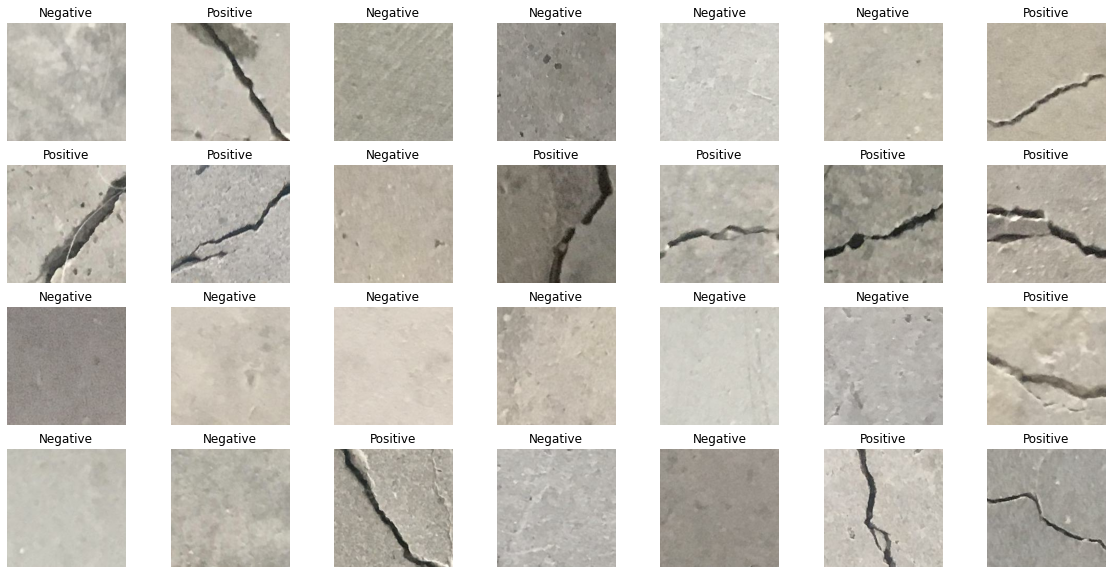

In [11]:
plt.figure(figsize=(20,10))
for image_batch, label_batch in ds.take(1):
    for i in range(28):
        ax=plt.subplot(4,7,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])


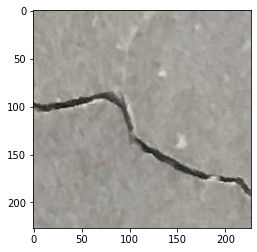

In [13]:
result = resize_and_rescale(image_batch[i])
_ = plt.imshow(result)


In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [25]:
image = tf.expand_dims(image_batch[1], 0)

In [26]:
image_n = tf.expand_dims(image_batch[0], 0)

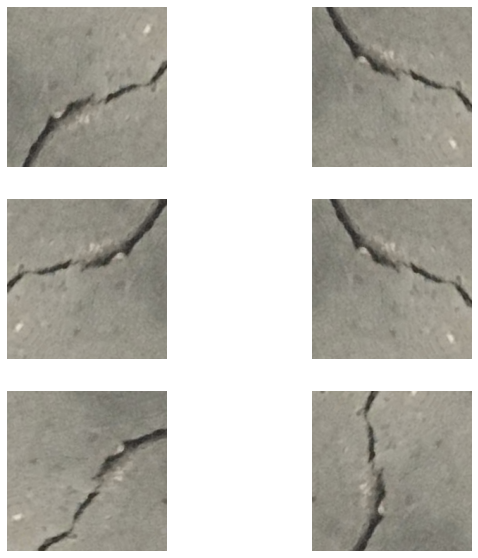

In [46]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in ds.take(1):
    for i in range(6):
      augmented_image = data_augmentation(image)
      ax = plt.subplot(3, 2, i + 1)
      plt.imshow(augmented_image[0].numpy().astype("uint8"))
      plt.axis("off")

In [31]:
def visualize(original, augmented):
  fig = plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original.numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented.numpy().astype("uint8"))

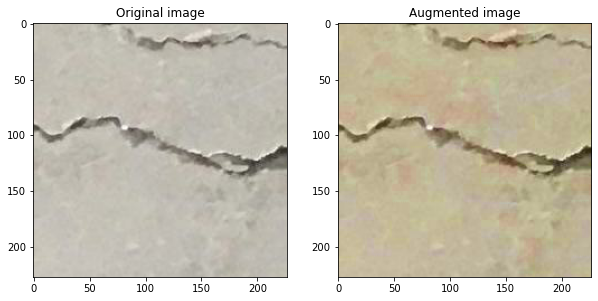

In [42]:
saturated = tf.image.adjust_saturation(image_batch[1], 3)
visualize(image_batch[1], saturated)

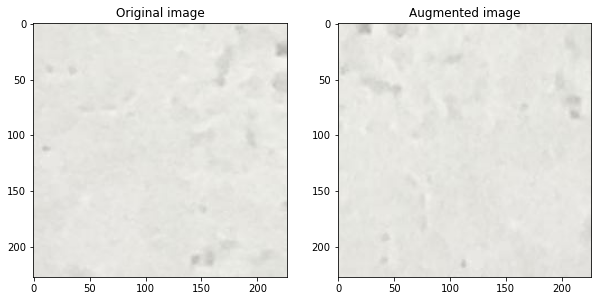

In [40]:
rotated = tf.image.rot90(image_batch[0])
visualize(image_batch[0], rotated)

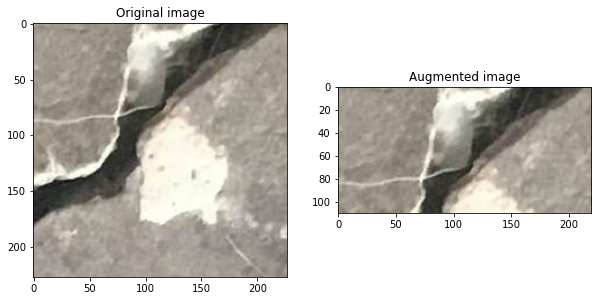

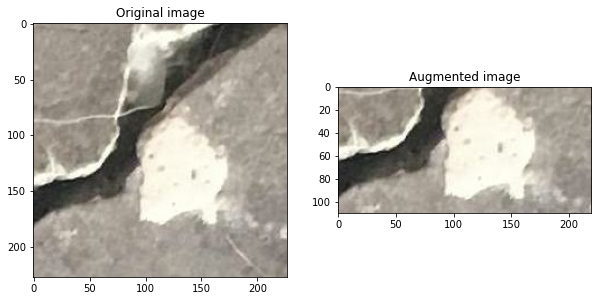

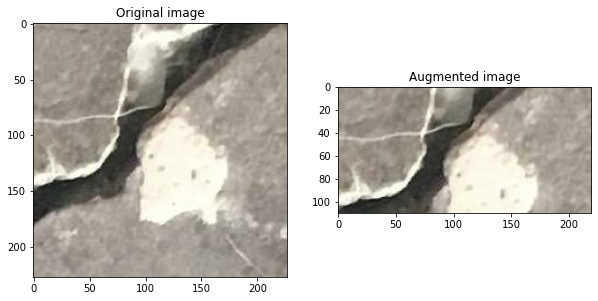

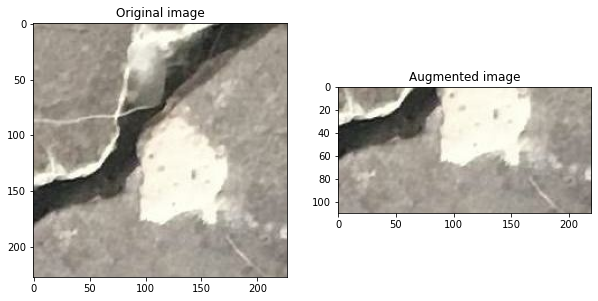

In [179]:
for i in range(4):
    seed = (i, 0)  
    stateless_random_crop = tf.image.stateless_random_crop(image_batch[1], size=[110, 220, 3], seed=seed)
    visualize(image_batch[1], stateless_random_crop)

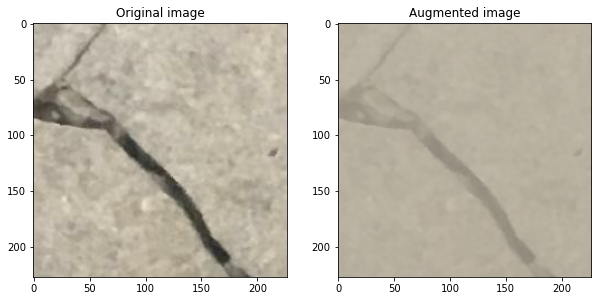

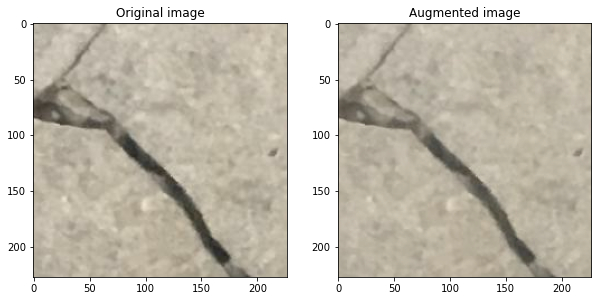

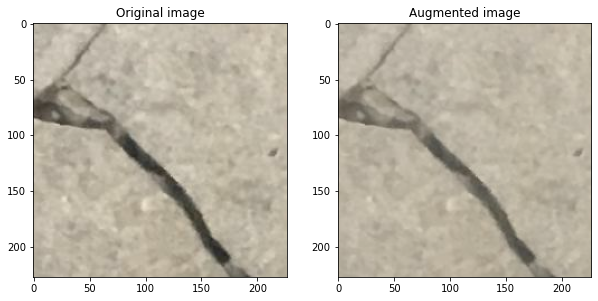

In [159]:
for i in range(3):
  seed = (i, 0)  
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image_batch[1], lower=0.1, upper=0.9, seed=seed)
  visualize(image_batch[1], stateless_random_contrast)